In [5]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [10]:
class AgentState(TypedDict):
    name:str
    values:List[int]
    operator:str
    result:str


def perform_operation(state: AgentState)->AgentState:
    
    arith = 0
    if(state['operator'] == '+'):
        arith = sum(state['values'])
    elif(state['operator']== '*'):
        arith = 1
        for num in state['values']:
            arith *= num
    
    
    state['result'] = f"Hi, {state['name']}, your calculation result is {arith}"
    return state


In [11]:
graph = StateGraph(AgentState)
graph.add_node('operator', perform_operation)
graph.set_entry_point('operator')
graph.set_finish_point('operator')

app = graph.compile()

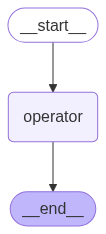

In [12]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
answer = app.invoke({'values':[1,2,3,4,5,6], 'name':'Temitayo', 'operator':'*'})

In [21]:
print(answer['result'])

Hi, Temitayo, your calculation result is 720
